In [2]:
from sympy import init_session
init_session()

IPython console for SymPy 1.10.1 (Python 3.10.6-64-bit) (ground types: gmpy)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.10.1/



In [3]:
ni, m, k, T = symbols("n_I m k_B T", real=True, positive=True)
p, v = symbols("p v", real=True)
n = symbols("n")

Let's write the Maxwell-Boltzmann distribution, already transformed into spherical coordinates:

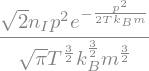

In [4]:
n = 4*pi* p**2 * ni / (2 * pi * m * k *T)**Rational(3,2) * exp(-p**2/(2*m*k*T))
n

## a.

We want to compute the average velocity:

$$\langle v \rangle = \frac{1}{n_I} \int_{-\infty}^{\infty} n(v)v d^3 v$$

We'll express $v = p / m$ and work in terms of momentum

$$\langle v \rangle = \frac{1}{m n_I} \int_{-\infty}^{\infty} n(p) p d^3 p$$

now switching to spherical coordinates in momentum space:

$$\langle v \rangle = \frac{1}{m n_I} \int_{0}^{\infty} 4 \pi n(p) p^3 dp$$


In [5]:
vavg = (1/ni) * integrate(n * p / m, (p, 0, oo))

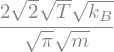

In [6]:
vavg

## b.

Now we want to compute the pressure via

$$P = \frac{1}{3} \int n(p) v p d^3p = \frac{1}{3} \int_0^\infty 4\pi p^2 n(p) \frac{p}{m} p dp $$

again, we'll work in terms of spherical coordinates in momentum-space

In [7]:
P = Rational(1, 3) * integrate(n * p / m * p, (p, 0, oo))
P

as you see, we recover the familiar ideal gas law!

$$P = n_I k T$$

## c.

Now the energy.  This is computed as:

$$\rho e = \int n(p) \mathcal{E}(p) d^3 p$$

we take

$$\mathcal{E}(p) = \frac{p^2}{2 m}$$

since we are not relativistic.

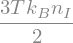

In [8]:
rhoE = integrate(n * p**2 / (2 * m), (p, 0, oo))
rhoE

From this we see that

$$\rho e = \frac{3}{2} P$$